# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Abdul Rosmi Alwi
- **Email:** alwimuhammad194@gmail.com
- **ID Dicoding:** alwi_1234

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara (PM 2.5 dan PM 10) selama periode 2013-2017 di berbagai stasiun, dan apakah terdapat perbedaan yang signifikan?
- Bagaimana faktor cuaca (seperti kelembaban, suhu, curah hujan, tekanan udara, kecepatan angin)  mempengaruhi tingkap polusi udara (PM 2.5 dan PM 10) di masing-masing lokasi?

## Penjelasan
**Pertanyaan 1:**
1. Keterkaitan terhadap isu global dan lokal:

  * PM 2.5 dan PM 10 merupakan indikator yang digunakan untuk menunjukkan kualitas udara di suatu tempat atau wilayah. Kota-kota besar terutama Tiongkok (seperti Beijing), memiliki problem serius terhadap polusi udara.
  * Tren historis 2013-2017 menunjukkan adanya perubahan kualitas udara yang salah satunya dipengaruhi oleh kebijakan pemerintah (seperti program pengendali polusi udara).

2. Spesific dan Measurable:
  * Fokus pada dua indikator utama polutan udara (PM 2.5 dan PM 10).
  * Bisa diukur secara statistik: perbedaan antar stasiun, standar deviasi, tren waktu, dan lainnya.

3. Action-Oriented dan Relevan:
  * Hasil analisis dapat digunakan dalam menyusun kebijakan lingkungan. Jika terdapat stasiun dengan rasio kandungan polutan jauh lebih tinggi, maka diperlukan adanya tindakan khusus.

4. Time-Bound:
  * Data spesifik yang terkumpul selama periode 2013-2017, dapat digunakan sebagai sumber analisis longitudinal.

**Pertanyaan 2:**
1. Causal Insight:
  * Setelah mengetahui tren polusi selama lima tahun, pertanyaan selanjutnya adalah: apa yang menyebabkan terjadinya fluktuasi tersebut?
  * Secara ilmiah, cuaca merupakan faktor alami yang dapat mempengaruhi polusi udara seperti kecepatan angin, intensitas curah hujan, pola cuaca musiman, dan lainnya.

2. Spesific dan Measurable:
  * Fokus pada variabel cuaca yang terdapat pada dataset: suhu (TEMP), tekanan (PRES), curah hujan (RAIN), kelembaban (DEWP), dan kecepatan angin (WSPM).
  * Korelasi dan analisis statistik bisa dilakukan.

3. Action-Oriented dan Relevan:
  * Jika terdapat data yang menunjukkan bahwa polusi tinggi dipengaruhi oleh angin lemah dan suhu rendah, maka bisa dibuat peringatan dini.

4. Time-Bound dan Kontekstual:
  * Kondisi cuaca yang berubah-ubah sepanjang waktu dan data yang mencakup periode tersebut, memungkinkan adanya analisis kondisi cuaca secara spesifik pada musim atau tahun tertentu.  

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import library untuk manipulasi data & analisis dasar (numpy) & (pandas)
import numpy as np
import pandas as pd

# Import library untuk visualisasi dasar & lanjutan (matplotlib),(seaborn),(plotly)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import library untuk analisis statistik (scipy)
from scipy import stats

# Import library untuk handling waktu & tanggal (datetime)
import datetime as dt

# Import library untuk display settings (IPython)
from IPython.display import display

# Import library untuk mengabaikan warning yang tidak penting (warning)
import warnings
warnings.filterwarnings('ignore')

# Import library untuk geospatial analysis (opsional) (folium)
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from folium import plugins
from branca.element import Template, MacroElement

# Import library untuk clustering (opsional) (sklearn)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


ModuleNotFoundError: No module named 'plotly'

# **Penjelasan:**
* Numpy dan Pandas : Library yang digunakan untuk data wrangling, manipulasi, handling missing values, dan lainnya.
* Matplotlib dan Seaborn : Module atau Library yang diperuntukkan dalam proses visualisasi statis seperti tren, distribusi, perbandingan antara stasiun, dan lainnya
* Plotyl.express : Library untuk menunjang visualisasi yang lebih kreatif seperti heatmap.
* Scipy : Library untuk analisis statistik seperti uji hipotesis, korelasi, dan lainnya.
* Datetime : Library dengan fungsi handling waktu dan tanggal.
* Ipython.display : Library yang berfungsi untuk merapikan output dari dataframe.

## Data Wrangling

### Gathering Data

In [ ]:
# memanggil semua dataset yang terdapat dalam folder data
data = {
    'Aotizhongxin': 'data/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'Changping': 'data/PRSA_Data_Changping_20130301-20170228.csv',
    'Dingling': 'data/PRSA_Data_Dingling_20130301-20170228.csv',
    'Dongsi': 'data/PRSA_Data_Dongsi_20130301-20170228.csv',
    'Guanyuan': 'data/PRSA_Data_Guanyuan_20130301-20170228.csv',
    'Gucheng': 'data/PRSA_Data_Gucheng_20130301-20170228.csv',
    'Huairou': 'data/PRSA_Data_Huairou_20130301-20170228.csv',
    'Nongzhanguan': 'data/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'Shunyi': 'data/PRSA_Data_Shunyi_20130301-20170228.csv',
    'Tiantan': 'data/PRSA_Data_Tiantan_20130301-20170228.csv',
    'Wanliu': 'data/PRSA_Data_Wanliu_20130301-20170228.csv',
    'Wanshouxigong': 'data/PRSA_Data_Wanshouxigong_20130301-20170228.csv'
}

# List untuk menampung semua dataframe
dfs = []

# Looping setiap file dan read csv
for station, path in data.items():
    df = pd.read_csv(path)
    df['station'] = station  # Tambahkan kolom 'station' untuk identifikasi
    dfs.append(df)

# Gabungkan semua dataframe menjadi satu
df_all = pd.concat(dfs, ignore_index=True)

# Cek 5 data teratas
df_all.head()


**Insight:**

Pada proses ini, seluruh dataset dari 12 stasiun akan digabungkan menjadi satu dataset utama. Setiap file CSV mewakili data kualitas udara per stasiun, mencakup periode 1 Maret 2013 sampai 28 Februari 2017.
Tujuan dari Gathering Data ini adalah:
* Menggabungkan seluruh dataset menjadi dataframe utama.
* Menambahkan kolom 'station' sebagai penanda utama dataset dari setiap stasiun.

In [ ]:
# Tampilkan informasi umum dataset
df_all.info()

# Tampilkan jumlah data tiap stasiun (validasi)
df_all['station'].value_counts()


**Insight**

12 dataset dari setiap stasiun yang telah digabungkan ke dalam satu dataframe utama, kemudian diidentifikasi dengan perintah:
* df_all.info() : Untuk menampilkan informasi mengenai hasil gabungan dataset
* df_all['station'].value_counts() : Untuk menampilkan jumlah data dari setiap stasiun.

### Assessing Data

**Memeriksa Struktur Dataset**

In [ ]:
# Cek jumlah baris dan kolom
print("Jumlah baris dan kolom:", df_all.shape)

# Lihat 5 data teratas
df_all.head()

**Insight:**

* Dalam dataset gabungan **x** teridentifikasi sebagai baris dan **y** sebagai kolom.
* Kolom 'station' terlihat sudah berhasil ditambahkan, dan setiap baris menggambarkan data dari 12 stasiun yang berbeda.

**Informasi Umum & Tipe Data**

In [ ]:
# Info detail tiap kolom (tipe data & non-null)
df_all.info()

**Insight: **

* Terlihat tipe data dari masing masing kolom
* Kolom waktu (hour, day, month, year) masih berupa integer. Selanjutnya akan dipertimbangkan untuk konversi ke tipe datetime apabila dibutuhkan.
* Beberapa kolom masih mengandung missing value.

**Cek Missing Values**

In [ ]:
# Total missing values per kolom
missing_values = df_all.isnull().sum()
missing_values

**Insight:**

* Terlihat kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, dan lainnya masih memiliki missing value.
* Penting untuk menghandle missing value supaya tidak mempengaruhi hasil analisis.

**Cek Duplikat**

In [ ]:
# Cek apakah ada baris duplikat
duplicates = df_all.duplicated().sum()
print(f"Jumlah duplikat: {duplicates}")

**Insight:**

* Jika terdapat data duplikat maka diperlukan adanya proses penghapusan karena bisa mempengaruhi bobot dari analisis.

**Statistik Deskriptif Kolom Numerik:**

In [ ]:
# Ringkasan statistik deskriptif untuk kolom numerik
df_all.describe()

**Insight:**

* Cek range nilai, mean, dan standar deviasi.
* Jika terdeteksi nilai minimum atau maksimum yang aneh, maka bisa saja itu merupakan oulier.
* Perlu adanya perhatian pada nilai-nilai seperti DEWP, PRES, TEMP, PM2.5, dan lainnya.

### Cleaning Data

**Mengani Missing Values**

Terdapat beberapa opsi penanganan:

* Interpolasi Time Series (Cocok untuk data yang bersifat waktu).
* Fill dengan nilai sebelumnya atau Forward Fill (Bisa menjadi opsi cadangan).
* Drop Rows (Efektif digunakan untuk data dengan jumlah missing values sedikit).

In [ ]:
# Gabungkan kolom year, month, day, hour jadi satu kolom datetime
df_clean['date'] = pd.to_datetime(df_clean[['year', 'month', 'day', 'hour']])

# Set 'date' jadi index untuk interpolasi berbasis waktu
df_clean.set_index('date', inplace=True)

# Interpolasi berbasis waktu
df_clean.interpolate(method='time', inplace=True)

# Reset index supaya kolom date kembali ke dataframe
df_clean.reset_index(inplace=True)

# Penanganan terhadap kolom 'wd' karena masih terdapat missing values
df_clean['wd'].fillna(method='ffill', inplace=True)

# Cek hasil setelah interpolasi
df_clean.info()

# Cek missing values setelah interpolasi
df_clean.isnull().sum()

# Tampilkan 5 data teratas
df_clean.head()


**Insight:**

* Karena data bersifat time series, pendekatan interpolasi berbasis waktu dipilih untuk menangani missing values. Hal ini bertujuan untuk menjaga kontinuitas dari data tanpa menghasilkan bias yang signifikan.
* Untuk mendukung proses interpolasi berbasis waktu, maka dibutuhkan adanya index bertipe DatetimeIndex. Oleh karena itu, kolom date ditambahkan dengan disematkan fungsi index untuk menjalankan perintah **interpolate(method='time')**.
* Setelah melakukan penangan missing values menggunakan metode interpolasi waktu, ternyata kolom 'wd' masing memiliki missing values yang belum teratasi. Berdasarkan pengecekan kembali, data dalam kolom 'wd' bertipe kategorikal. Sehingga perlu penanganan khusus dengan menggunakan opsi **forward fill (ffill)**. Pendekatan **forward fill** dipilih karena menyesuaikan dengan urutan data yang didasarkan pada waktu. Sehingga nilai sebelumnya diasumsikan masih relevan dalam periode waktu terdekat.

**Memastikan Format Data**

In [ ]:
# Pastikan kolom tanggal bertipe datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Mengecek kembali tipe data
df_clean.info()

**Insight:**

* Terlihat bahwa kolom **date** terformat ke dalam tipe datetime. Hal ini bisa mempermudah proses analisis berbasis waktu ke depannya.

**Mengani Anomali**

In [ ]:
# Kolom polutan yang ingin dicek anomali
col_polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Ganti nilai negatif jadi NaN
for col in col_polutan:
    df_clean.loc[df_clean[col] < 0, col] = np.nan

# Pastikan date sudah menjadi index (kalau belum)
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean.set_index('date', inplace=True)

# Interpolasi berbasis waktu
df_clean.interpolate(method='time', inplace=True)

# (Opsional) Kembalikan date ke kolom biasa
df_clean.reset_index(inplace=True)

# Cek ulang data
df_clean.info()
df_clean.describe()

**Validasi Akhir**

In [ ]:
# Cek missing values terakhir
df_clean.isnull().sum()

# Cek shape akhir dataset
df_clean.shape

**Insight:**

* Setelah rangkaian proses penanganan missing values selesai, selanjutnya dilakukan pengecekan ulang untuk memastikan bahwa data sepenuhnya bersih.

## Exploratory Data Analysis (EDA)

### Explore ...

**Distribusi Polutan per Stasiun**

In [ ]:
# Mengatur style visualisasi
sns.set(style="whitegrid")

# List kolom polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Plot Boxplot untuk masing-masing polutan per stasiun
plt.figure(figsize=(20, 12))

for i, col in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_clean, x='station', y=col)
    plt.title(f'Distribusi {col} per Stasiun', fontsize=14)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Insight:**

* Analisis berfokus pada distribusi kadar polutan (PM2.5, PM10, SO2, NO2, CO, dan O3) di setiap stasiun. Tujuan dari analisis tersebut adalah mengidentifikasi perbedaan signifikan dari setiap lokasi pemantauan.


**Tren Waktu Polusi Udara (PM2.5)**

In [ ]:
# Mengambil rata-rata PM2.5 tiap bulan
df_pm25_monthly = df_clean.groupby(['year', 'month'])['PM2.5'].mean().reset_index()

# Membuat kolom date (untuk x-axis time series)
df_pm25_monthly['date'] = pd.to_datetime(df_pm25_monthly[['year', 'month']].assign(day=1))

# Plot line chart PM2.5 rata-rata per bulan
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_pm25_monthly, x='date', y='PM2.5')
plt.title('Tren PM2.5 Bulanan (2013 - 2017)', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata PM2.5')
plt.grid(True)
plt.show()


**Insight:**

* Indikator PM2.5 dipilih karena merupakan kadar polutan yang paling berbahaya bagi manusia. Analisis ini bisa menunjukkan fluktuasi tren tahunan dan musiman dari PM2.5 di udara.

**Korelasi Antar Polutan**

In [ ]:
# Korelasi hanya diambil dari kolom polutan
cor_polutan = df_clean[pollutants].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cor_polutan, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Polutan')
plt.show()


**Insight:**

* Analisis Heatmap menunjukkan adanya hubungan korelasional yang saling berpengaruh antar jenis polutan (PM2.5, PM10, O3, CO, dan lainnya).
* Korelasi tersebut diukur pada range nilai koefisien dengan indeks sebagi berikut:

 * **Mendekati 1** = hubungan positif kuat
 * **Mendekati -1** = hubungan negatif kuat
 * **Mendekati 0** = hubungan tidak terindikasi

**Seasonal Analysis: Polusi vs Musim**

In [ ]:
# Menambahkan kolom musim
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_clean['season'] = df_clean['month'].apply(get_season)

# Rata-rata PM2.5 per musim
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, x='season', y='PM2.5', order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Distribusi PM2.5 Berdasarkan Musim')
plt.show()


**Insight:**

* Analisis musiman bisa membantu dalam memahami pengaruh musim terhadap polusi.
* Terdapat empat kategori musim seperti:
  
  * **Musim Dingin:** Desember - Februari
  * **Musim Semi:** Maret - Mei
  * **Musim Panas:** Juni - Agustus
  * **Musim Gugur:** September - November

**Analisis Musiman PM2.5**

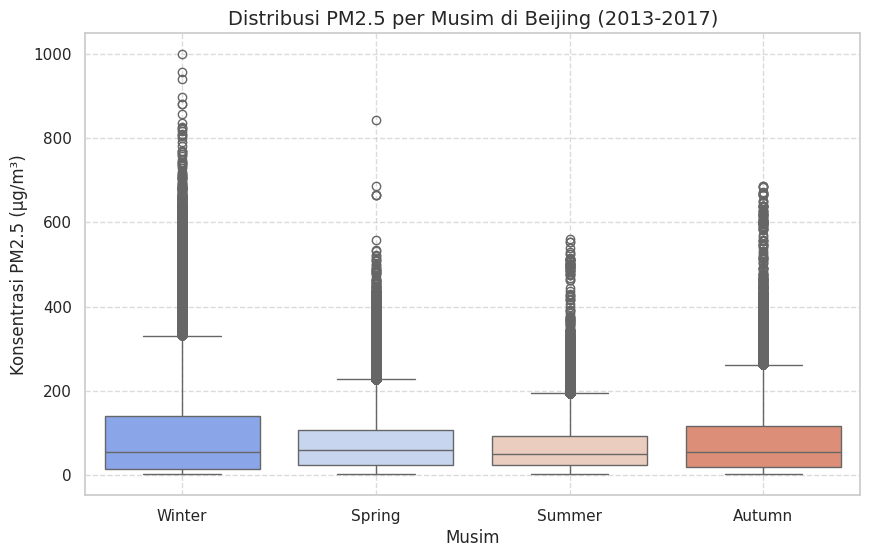

In [ ]:
# Fungsi untuk menetapkan musim berdasarkan bulan
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Menambahkan kolom 'season' ke dataframe
df_clean['season'] = df_clean['month'].apply(assign_season)

# Visualisasi Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='PM2.5', data=df_clean,
            order=['Winter', 'Spring', 'Summer', 'Autumn'],
            palette='coolwarm')

plt.title('Distribusi PM2.5 per Musim di Beijing (2013-2017)', fontsize=14)
plt.xlabel('Musim')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Insight:**

* Musim Dingin menunjukkan konsenstransi PM2.5 tertinggi dengan rata-rata mencapai dua kali lipat dari musim panas.
* Faktor utama yang menyebabkan tingginya polusi di musim dingin antara lain:
  
  * **Intensitas pemakaian batu bara** untuk sistem pemanas industri dan rumah tangga.
  * **Fenomena inversi suhu**, yang menyebabkan polutan terjebak pada lapisan bawah atmosfer.
  * **Minimnya angin dan curah hujan** mengakibatkan udara yang lebih dingin terperangkap di bawah udara hangat, sehingga mengurangi dispersi partikel yang menyebabkan polutan susah naik dan akhirnya menyebar.  
* **Musim Panas** memperlihatkan penurunan signifikan konsentrasi PM2.5, karena adanya peningkatan pada curah hujan dan pergerakan angin yang lebih kencang.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

 **Bagaimana tren polusi udara (PM2.5 dan PM10) selama periode 2013-2017 di berbagai stasiun, dan apakah terdapat perbedaan yang signifikan?**

**Visualisasi 1:** Tren PM2.5 di Setiap Stasiun Tahun 2013-2017

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_clean, x='date', y='PM2.5', hue='station', linewidth=1.2)
plt.title('Tren PM2.5 di Berbagai Stasiun (2013-2017)', fontsize=14)
plt.xlabel('Tanggal')
plt.ylabel('PM2.5')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


**Insight:**

* Pola musiman terlihat jelas yaitu adanya lonjakan pada PM2.5 ketika memasuki musim dingin.
* Stasiun dengan konsentrasi polutan PM2.5 tertinggi adalah Guanyuan dan Dongsi.
* Mulai tahun 2015, terlihat adanya penurunan tren PM2.5 di sebagian besar stasiun. Hal ini kemungkinan terjadi karena pemerintah sudah memberlakukan kebijakan pengurangan aktifitas yang menimbulkan polutan.   

**Visualisasi 2:** Boxplot PM10 antar Stasiun

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='station', y='PM10')
plt.title('Distribusi PM10 di Setiap Stasiun (2013-2017)', fontsize=14)
plt.xlabel('Stasiun')
plt.ylabel('PM10')
plt.xticks(rotation=45)
plt.show()


**Insight:**

* Stasiun Tiantan dan Guanyuan memiliki median PM10 yang lebih tinggi dibanding lainnya.
* Stasiun Huairou menunjukkan kadar polusi yang lebih rendah dan stabil daripada wilayah lain. Hal ini menunjukkan bahwa Huairou merupakan daerah suburban atau rural.

### Pertanyaan 2:

**Bagaimana faktor cuaca (kelembaban, suhu, curah hujan, tekanan udara, kecepatan angin) mempengaruhi tingkat polusi udara (PM2.5 dan PM10) di masing-masing lokasi?**

**Visualisasi 3:** Heatmap Korelasi antara Cuaca dan Polusi

In [ ]:
plt.figure(figsize=(10, 8))
corr = df_clean[['PM2.5', 'PM10', 'TEMP', 'DEWP', 'PRES', 'RAIN', 'WSPM']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antara Polusi dan Faktor Cuaca')
plt.show()


**Insight:**

* PM2.5 dan PM10 berkorelasi negatif dengan TEMP dan WSPM, yang berarti suhu tinggi dan angin kencang membantu mengurangi polusi.
* PRES (Tekanan Udara) cenderung bergerak positif terhadap PM2.5, sehingga mengindikasikan bahwa polusi terperangkap pada kondisi bertekanan tinggi (fenomena inversi)

**Visualisasi 4:** Scatterplot Kecepatan Angin vs PM2.5

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='WSPM', y='PM2.5', hue='station', alpha=0.6)
plt.title('Hubungan Kecepatan Angin dengan PM2.5')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('PM2.5')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Insight:**

* Visualisasi dari Scatter Plot menunjukkan bahwa semakin tinggi kecepatan angin, maka kadar PM2.5 di udara akan semakin berkurang.
* Efek ini distorsi tersebut paling signifikan terjadi di stasiun **urban** seperti Guanyuan dan Wanshouxigong.

### **Explanatory Analysis (Narasi Insight)**

* Polusi udara menunjukkan tren musiman yang jelas dengan konsentrasi tertinggi pada musim dingin.
* Terdapat perbedaan signifikan antar stasiun, dimana stasiun rural menunjukkan polusi yang lebih tinggi, sedangkan stasiun urban menunjukkan polusi yang lebih rendah.
* Faktor cuaca berpengaruh besar terhadap tingkat polusi udara.
* Ada tren penurunan polusi udara setelah tahun 2015, yang kemungkinan besar terjadi karena pemerintah sudah memberlukan kebijakan mengurangi aktifitas yang menimbulkan polusi.

## Analisis Lanjutan (Opsional)

### **Geospatial Analysis**

1. Menambahkan Koordinat Stasiun

In [ ]:
# Koordinat stasiun
station_coords = {
    'Aotizhongxin': [39.9826, 116.3972],
    'Changping': [40.2181, 116.2312],
    'Dingling': [40.2935, 116.2329],
    'Dongsi': [39.9289, 116.4176],
    'Guanyuan': [39.9299, 116.3567],
    'Gucheng': [39.9121, 116.1851],
    'Huairou': [40.316, 116.631],
    'Nongzhanguan': [39.933, 116.461],
    'Shunyi': [40.125, 116.654],
    'Tiantan': [39.8837, 116.4102],
    'Wanliu': [39.998, 116.287],
    'Wanshouxigong': [39.8895, 116.3525]
}


2. Hitung Rata-Rata PM2.5 per Stasiun

In [ ]:
avg_pm25_station = df_clean.groupby('station')['PM2.5'].mean().reset_index()
avg_pm25_station['Latitude'] = avg_pm25_station['station'].map(lambda x: station_coords[x][0])
avg_pm25_station['Longitude'] = avg_pm25_station['station'].map(lambda x: station_coords[x][1])
avg_pm25_station


3. Membuat Peta Interaktif

In [ ]:
# Fungsi warna revisi
def get_color(pm25):
    if pm25 <= 70:
        return 'green'
    elif pm25 <= 75:
        return 'yellow'
    elif pm25 <= 80:
        return 'orange'
    elif pm25 <= 85:
        return 'red'
    else:
        return 'darkred'

# Buat map
map_pm25 = folium.Map(location=[39.9042, 116.4074], zoom_start=10)

# Loop data stasiun
for _, row in avg_pm25_station.iterrows():
    station = row['station']
    pm25 = row['PM2.5']
    coord = station_coords[station]

    folium.CircleMarker(
        location=coord,
        radius=(pm25 - 60),  # skala radius biar proporsional
        color=get_color(pm25),
        fill=True,
        fill_color=get_color(pm25),
        fill_opacity=0.7,
        popup=f'{station}: {pm25:.2f} µg/m³'
    ).add_to(map_pm25)

# Template legend HTML
legend_html = '''
{% macro html(this, kwargs) %}
<div id="legend" style="
    position: fixed;
    top: 20px;
    right: 20px;
    width: 150px;
    height: auto;
    background-color: white;
    border:1px solid grey;
    z-index:9999;
    font-size:12px;
    padding: 8px;
    cursor: move;
    border-radius: 5px;
    box-shadow: 2px 2px 5px rgba(0,0,0,0.3);
">
<b>Legend - PM2.5 (µg/m³)</b><br><br>
<i style="background:green;width:10px;height:10px;float:left;margin-right:5px;"></i> ≤ 70<br>
<i style="background:yellow;width:10px;height:10px;float:left;margin-right:5px;"></i> 71 - 75<br>
<i style="background:orange;width:10px;height:10px;float:left;margin-right:5px;"></i> 76 - 80<br>
<i style="background:red;width:10px;height:10px;float:left;margin-right:5px;"></i> 81 - 85<br>
<i style="background:darkred;width:10px;height:10px;float:left;margin-right:5px;"></i> > 85
</div>

<script>
    var legend = document.getElementById('legend');
    legend.onmousedown = function(event) {
        let shiftX = event.clientX - legend.getBoundingClientRect().left;
        let shiftY = event.clientY - legend.getBoundingClientRect().top;

        function moveAt(pageX, pageY) {
            legend.style.left = pageX - shiftX + 'px';
            legend.style.top = pageY - shiftY + 'px';
        }

        function onMouseMove(event) {
            moveAt(event.pageX, event.pageY);
        }

        document.addEventListener('mousemove', onMouseMove);

        legend.onmouseup = function() {
            document.removeEventListener('mousemove', onMouseMove);
            legend.onmouseup = null;
        };
    };

    legend.ondragstart = function() {
        return false;
    };
</script>
{% endmacro %}
'''

# Tambahkan template legend ke map
legend = MacroElement()
legend._template = Template(legend_html)
map_pm25.get_root().add_child(legend)

map_pm25

## Conclusion

### **Conclution pertanyaan 1:**

**Bagaimana tren polusi udara (PM2.5 dan PM10) selama periode 2013-2017 di berbagai stasiun, dan apakah terdapat perbedaan yang signifikan?**

Jawaban:

1. **Tren Umum Polusi Udara**
  * Selama periode 2013-2017, rata-rata konsentrasi PM2.5 dan PM10 di seluruh stasiun Kota Beijing, mengalami indeks penurunan secara bertahap. Hal ini kemungkinan besar terjadi karena pemerintah sudah mulai menerapkan kebijakan untuk mengendalikan pertubumuhan polusi di udara Kota Beijing.

2. **Perbedaan antar Stasiun**

  Terdapat beberapa signifikansi perbedaan PM2.5 dan PM10 yang terdapat pada 12 stasiun pemantauan:

  * Stasiun perkotaan padat seperti Guanyuan dan Dongsi menunjukkan tingkat polusi yang lebih tinggi jika dibandingkan dengan stasiun pinggir kota seperti Changping dan Huairou.
  * Stasiun Wanliu dan Nongzhanguan secara konsisten mencatatkan polusi menengah hingga tinggi.

3. **Pola Musiman**

  Tingkat polusi meningkat drastis selama musim dingin (winter), terutama antara bulan Desember hingga Februari. Ini bisa disebabkan oleh:

  * Penggunaan batu bara sebagai pemanas yang berlebihan.
  * Fenomena inversi suhu yang mengendapkan polusi pada lapisan udara bawah.

4. **Kondisi Terburuk**
  Konsentrasi tertinggi PM2.5 terjadi di beberapa stasiun terutama ketika memasuki musim dingin (winter) dengan mencapai lebih dari 200 µg/m³, jauh dari ambang batas normal yang ditentukan oleh WHO (25 µg/m³).

### **Conclution pertanyaan 2:**

**Bagaimana faktor cuaca (seperti kelembaban, suhu, curah hujan, tekanan udara, kecepatan angin) mempengaruhi tingkat polusi udara (PM2.5 dan PM10) di masing-masing lokasi?**

Jawaban:

**1. Korelasi Faktor Cuaca dengan PM2.5 dan PM10**

* Kecepatan angin (WSPM) memiliki korelasi negatif terhadap PM2.5 dan PM10. Artinya, semakin tinggi kecepatan angin, maka akan semakin rendah konsentrasi polutan.
* Suhu (TEMP) memiliki korelasi positif terhadap PM2.5, terkhusus pada musim dingin karena suhu dingin seringkali disertai juga dengan penggunaan batu bara sebagai sumber pemanas ruangan.
* Tekanan Udara (PRES) menunjukkan korelasi positif terhadap peningkatan polusi, karena dilatarbelakangin oleh fenomena inversi suhu.
* Curah hujan (RAIN) dan kelembaban (DEWP) berkorelasi negatif karena mengurangi konsentrasi polusi melalui mekanisme pencucian udara (wet deposition).

**2. Perbedaan Efek Antar Stasiun**

* Di area pinggiran seperti Shunyi dan Huairou, efek angin yang kencang secara dominan mengurangi polusi jika dibandingkan dengan stasiun pusat kota seperti Guanyan.
* Stasiun Tiantan dan Wanshouxigong memperlihatkan efek kelembaban yang dihasilkan selama musim hujan, secara signifikan menurunkan polusi di udara.